# Data Transformation

The last resort after determining a data is not normal (after trying a nonparametric alter
native) is to transform the data. But again, try the other steps before transforming 
the data. While sometimes it is necessary to perform a data transformation, avoid 
doing so if a few extreme values, excessive rounding, or values below a level of 
quantification are forcing the use of a transformation.

In [12]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from stats_plots import qqplot, boxcox
import numpy as np
import pandas as pd
plt.style.use('classic')

In [22]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Two Sample T Test",
        usecols = ["Defects per Airbag", "Shift"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# For all numeric columns
df.describe()

,Defects per Airbag
count,45.000000
mean,0.259316
std,0.086606
min,0.104167
25%,0.198630
50%,0.207469
75%,0.361570
max,0.411946


-  Note: Box-cox requires original data values to be greater than zero. If zero or negative, go to the “Johnson’s transformation,” or do a manual transformation (e.g., add values to get above 1 and then transform).

In [14]:
# Ensure 'Shift' is categorical
df['Shift'] = df['Shift'].astype('category')

# Split the data
before = df.loc[df["Shift"] == "Before", "Defects per Airbag"].dropna().to_numpy()
after = df.loc[df["Shift"] == "After", "Defects per Airbag"].dropna().to_numpy()

## Normality check $-$ QQ plot


A² (raw): 3.0303
A²* (adj.): 3.1168
Approx. p-value: 0.0000

A² (raw): 0.6215
A²* (adj.): 0.6561
Approx. p-value: 0.0868


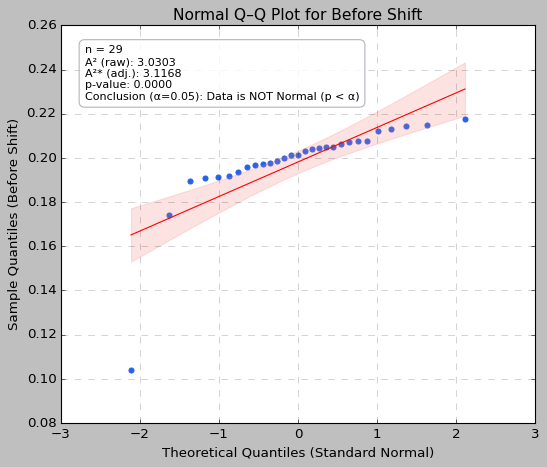

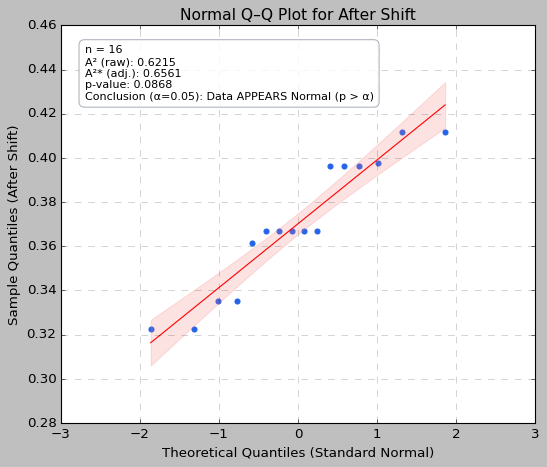

In [26]:
plot_1 = qqplot(before, label="Before Shift")
plot_2 = qqplot(after, label="After Shift")

## Boc-Cox transformation 

In [25]:
data = df['Defects per Airbag'].values

original_data = data

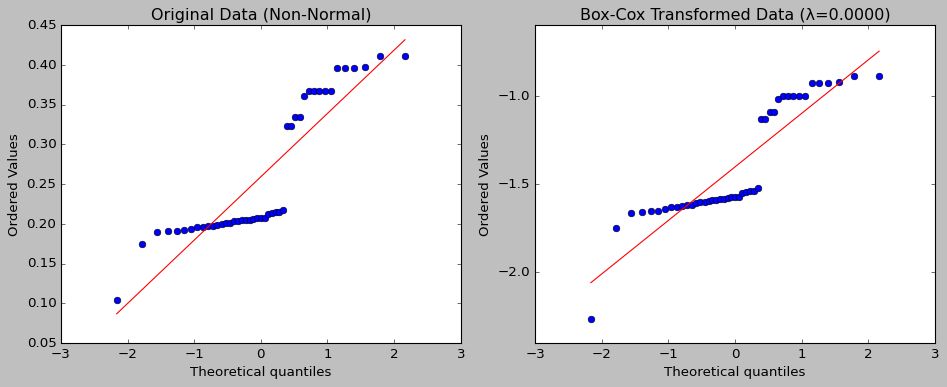


Optimal Lambda (λ): 0.0000
Suggested Transformation: log transform
Transformed USL (USL'): -0.8675
Transformed LSL (LSL'): -2.3026
Transformed Mean (X̄'): -1.4021
Transformed StDev (s'): 0.3253


In [23]:
result = boxcox(original_data, USL = 0.42, LSL = 0.1)

# Access the returned values
USL_prime = result["USL_prime"]
LSL_prime = result["LSL_prime"]
X_bar_prime = result["X_bar_prime"]
s_prime = result["s_prime"]
transformed_data = result["transformed_data"]


A² (raw): 4.2698
A²* (adj.): 4.3917
Approx. p-value: 0.0000

A² (raw): 0.6472
A²* (adj.): 0.6833
Approx. p-value: 0.0744


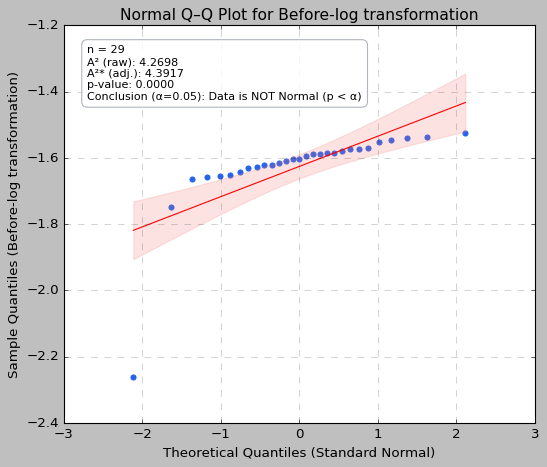

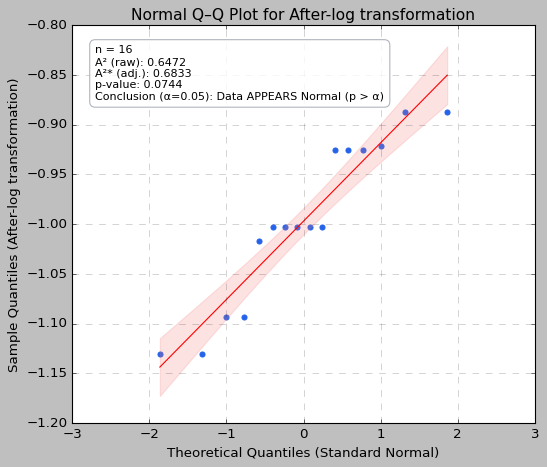

In [27]:
# Apply λ = 0 (log transform) to each subset
before_log = np.log(before)
after_log = np.log(after)

plot_3 = qqplot(before_log, label="Before-log transformation")
plot_4 = qqplot(after_log, label="After-log transformation")

## Box-Cox Transformation and Outlier Handling

- **Correct statistical practice (recommended):**
    - Outliers should be **removed before applying Box-Cox**, so that the transformation $\lambda$ is estimated based on the actual data you want to analyze.
    - QQ plots and normality checks are then performed on the **cleaned, transformed data**.

- **What I did (exploratory approach):**
    - I **did not remove the outlier** before Box-Cox, in order to observe the **full effect of the transformation**, including the influence of the extreme point.
    - QQ plots are generated for the transformed data as-is, reflecting all original observations.

- **Author’s misleading method (as seen in the book):**
    - In the book, the QQ plot shows **28 points instead of 29**, but it is **not explicitly stated** that an outlier was removed after applying Box-Cox.
    - This is misleading because the transformation λ was computed on the full dataset, but the QQ plot represents a subset, giving the impression that the transformation is fitted to the cleaned data.
    - Correct practice would be either to:
        1. Remove outliers **before** Box-Cox, or
        2. Clearly document that outliers were removed **after Box-Cox for visualization only**.